## [教學目標]

學習使用 sklearn 中的 train_test_split 等套件，進行資料的切分

## [範例重點]

了解函數中各個參數的意義

引入我們需要的套件

In [1]:
from sklearn.model_selection import train_test_split, KFold
import numpy as np

## 用 numpy 生成隨機資料

In [2]:
X = np.arange(50).reshape(10, 5) # 生成從 0 到 50 的 array，並 reshape 成 (10, 5) 的 matrix
y = np.zeros(10) # 生成一個全零 arrary
y[:5] = 1 # 將一半的值改為 1
print("Shape of X: ", X.shape)
print("Shape of y: ", y.shape)

Shape of X:  (10, 5)
Shape of y:  (10,)


In [3]:
print('X: shape: ' + str(X.shape))
print(X)
print("")
print('y: shape: ' + str(y.shape))
print(y)

X: shape: (10, 5)
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]
 [30 31 32 33 34]
 [35 36 37 38 39]
 [40 41 42 43 44]
 [45 46 47 48 49]]

y: shape: (10,)
[1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]


## 使用 train_test_split 函數進行切分

請參考 train_test_split 函數的說明，了解函數裡的參數意義

test_size 一定只能小於 1 嗎？

random_state 不設置會怎麼樣呢？

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
X_train

array([[35, 36, 37, 38, 39],
       [10, 11, 12, 13, 14],
       [45, 46, 47, 48, 49],
       [20, 21, 22, 23, 24],
       [15, 16, 17, 18, 19],
       [30, 31, 32, 33, 34]])

In [6]:
y_train

array([0., 1., 0., 1., 1., 0.])

## 使用 K-fold Cross-validation 來切分資料

請參考 kf 函數的說明，了解參數中的意義。K 可根據資料大小自行決定，K=5 是蠻常用的大小

如果使用 shuffle=True 會怎麼樣?

In [7]:
kf = KFold(n_splits=5)
i = 0
for train_index, test_index in kf.split(X):
    i +=1 
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    print("FOLD {}: ".format(i))
    print("X_test: ", X_test)
    print("Y_test: ", y_test)
    print("-"*30)

FOLD 1: 
X_test:  [[0 1 2 3 4]
 [5 6 7 8 9]]
Y_test:  [1. 1.]
------------------------------
FOLD 2: 
X_test:  [[10 11 12 13 14]
 [15 16 17 18 19]]
Y_test:  [1. 1.]
------------------------------
FOLD 3: 
X_test:  [[20 21 22 23 24]
 [25 26 27 28 29]]
Y_test:  [1. 0.]
------------------------------
FOLD 4: 
X_test:  [[30 31 32 33 34]
 [35 36 37 38 39]]
Y_test:  [0. 0.]
------------------------------
FOLD 5: 
X_test:  [[40 41 42 43 44]
 [45 46 47 48 49]]
Y_test:  [0. 0.]
------------------------------


## [作業重點]

觀察函數說明，要如何切出固定大小的測試集?

## 作業

假設我們資料中類別的數量並不均衡，在評估準確率時可能會有所偏頗，試著切分出 y_test 中，0 類別與 1 類別的數量是一樣的 (亦即 y_test 的類別是均衡的)

In [8]:
X = np.arange(1000).reshape(200, 5)
y = np.zeros(200)
y[:40] = 1

In [9]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

可以看見 y 類別中，有 160 個 類別 0，40 個 類別 1 ，

請試著使用 train_test_split 函數，切分出 y_test 中能各有 10 筆類別 0 與 10 筆類別 1 。(HINT: 參考函數中的 test_size，可針對不同類別各自作切分後再合併)

## 練習時間

In [10]:
len(y)

200

In [11]:
y.sum()

40.0

In [12]:
# 因為前面設定 y[:40] = 1
X1_train, X1_test, y1_train, y1_test = train_test_split(X[:40], y[:40], test_size=(1/4), random_state=87) #   40X = 10, X = 1/ 4 = 0.25

X0_train, X0_test, y0_train, y0_test = train_test_split(X[40:], y[40:], test_size=(1/16), random_state=87) # 160X = 10, X = 1/16 = 0.0625

# concat np array ： numpy.concatenate
y_test = np.concatenate((y0_test, y1_test))
y_test

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

## 參考資料

## 理解訓練、驗證與測試集的意義與用途

影片連結：[台大電機李宏毅教授講解訓練/驗證/測試集的意義]()

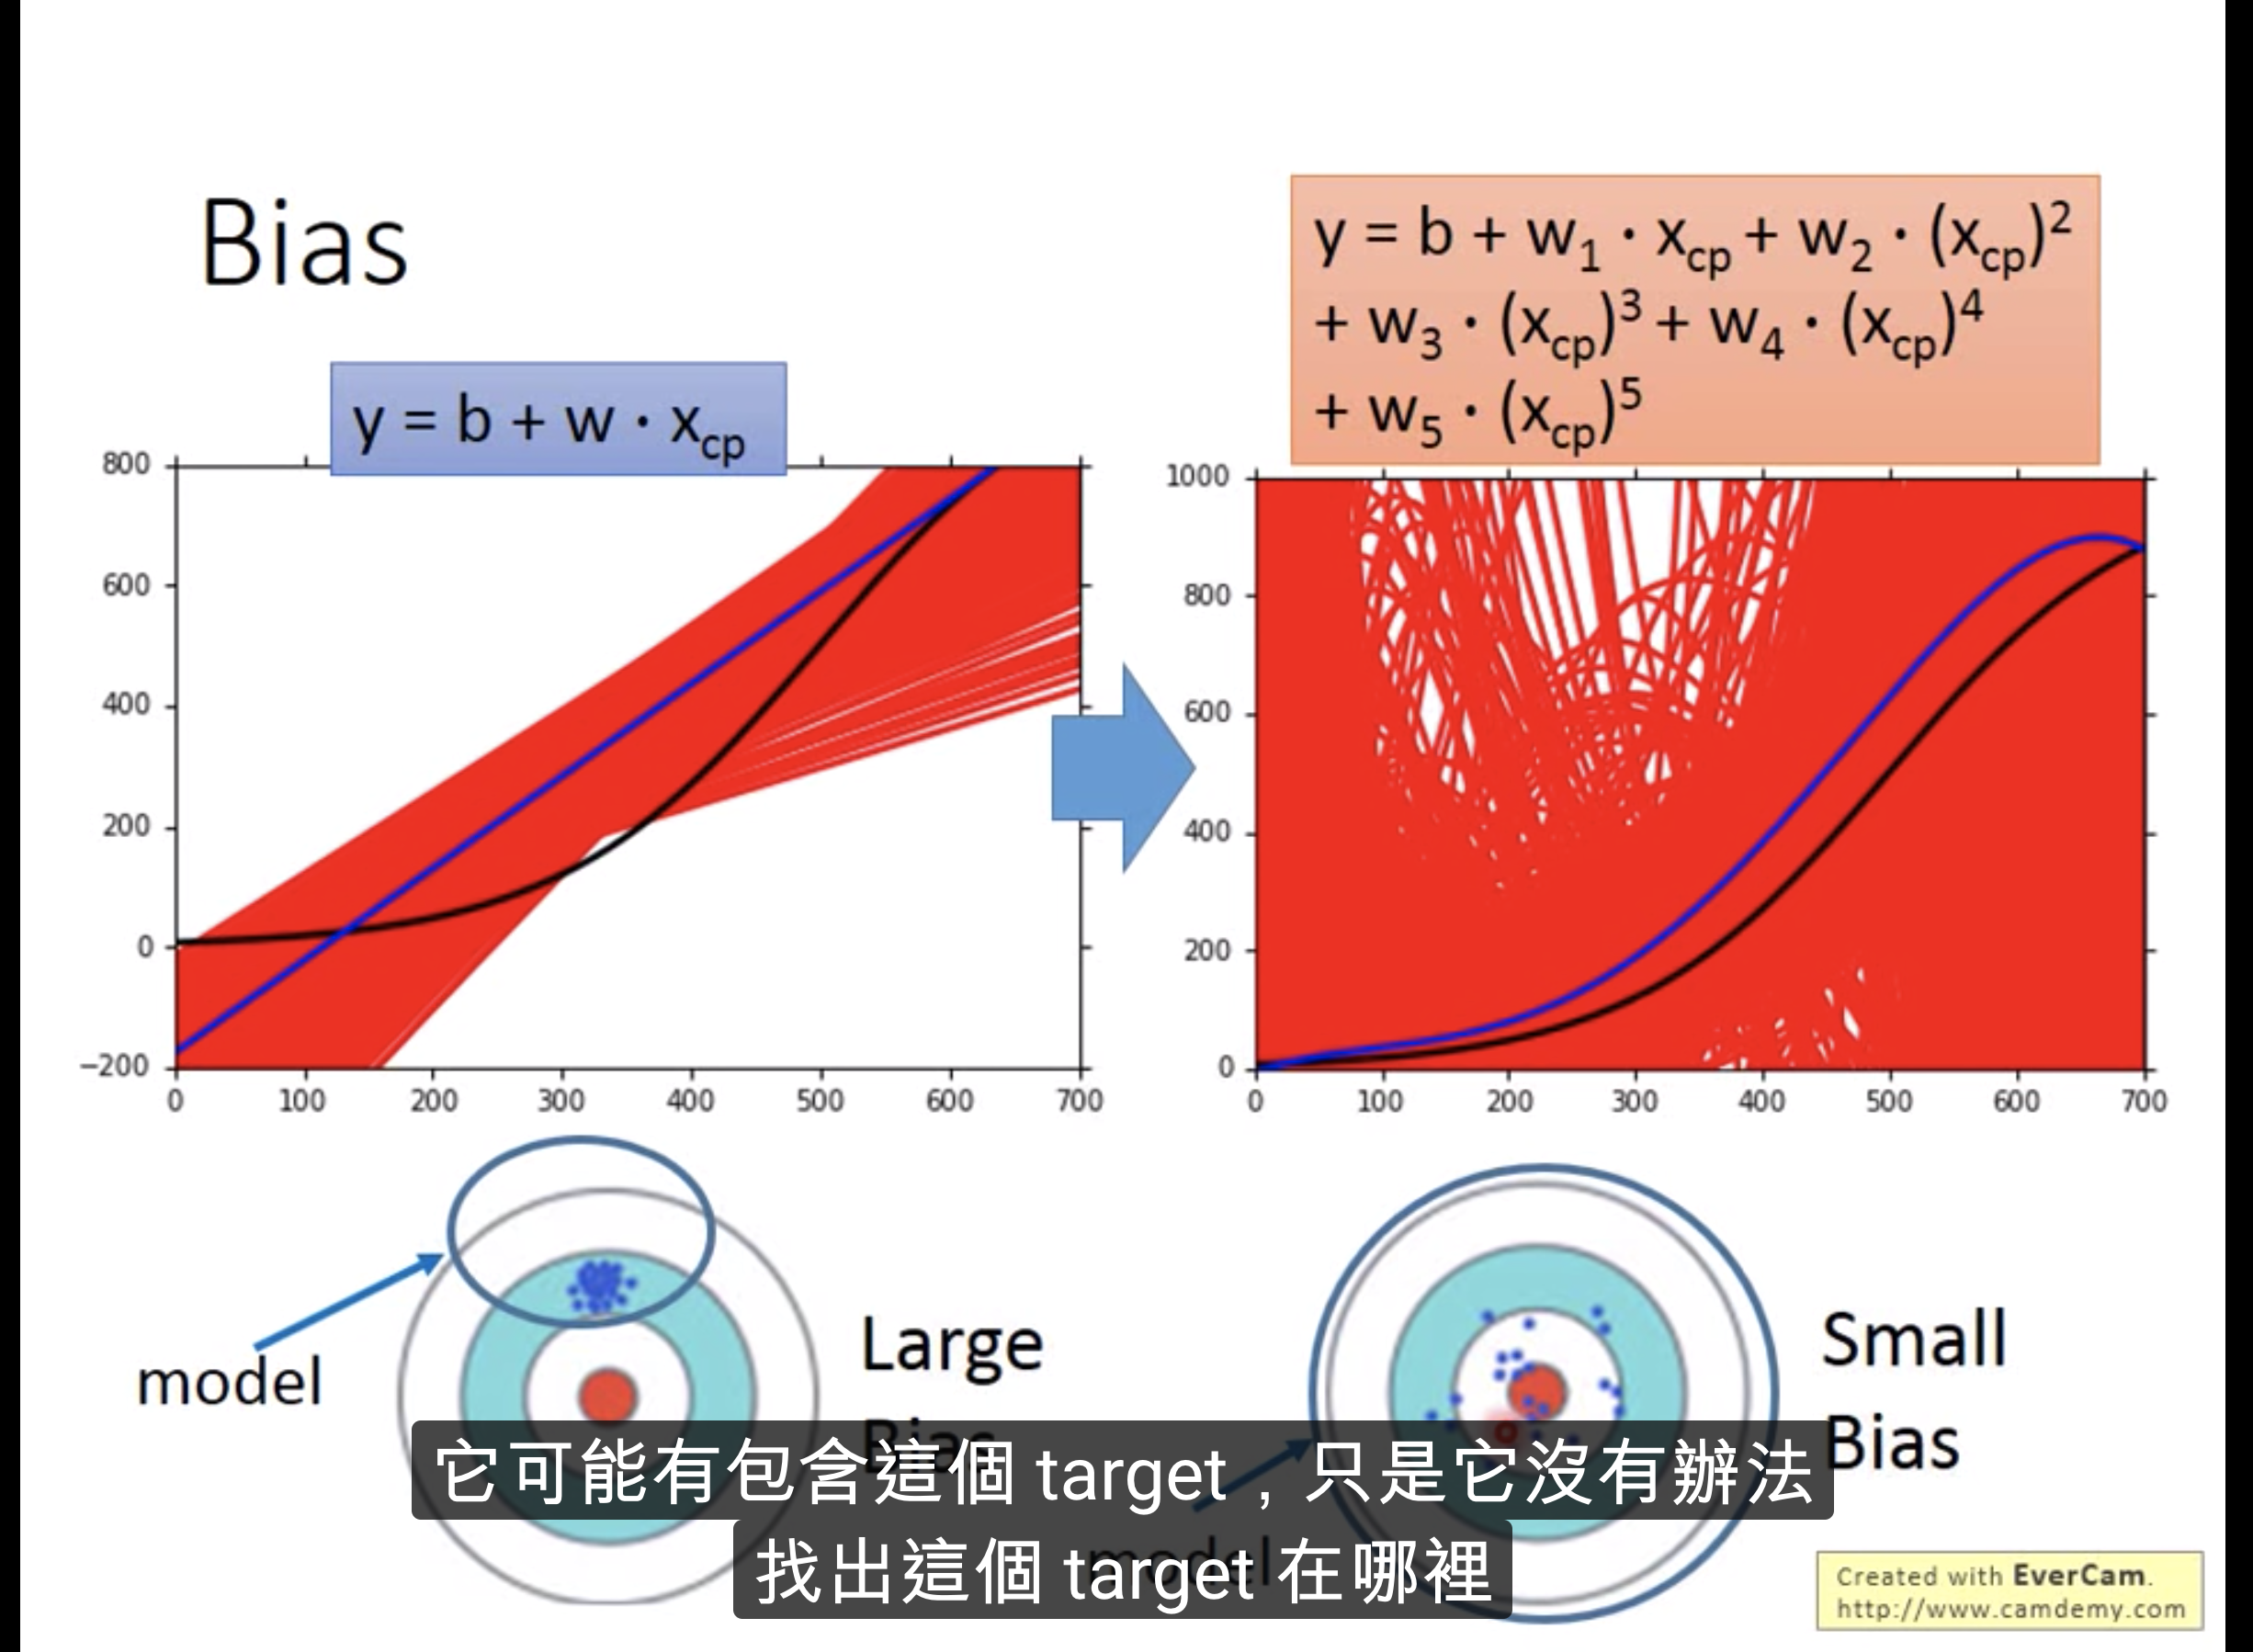

## <font color='dodgerblue'>Underfitting cuz [Large Bias]</font> 

## <font color='dodgerblue'>Overfitting cuz [Large Variance]</font> 

## <font color='red'>所以今天你得到結果是 Error 很大時，應該要知道到底是Bias很大還是Variance很大，才能做future work</font> 

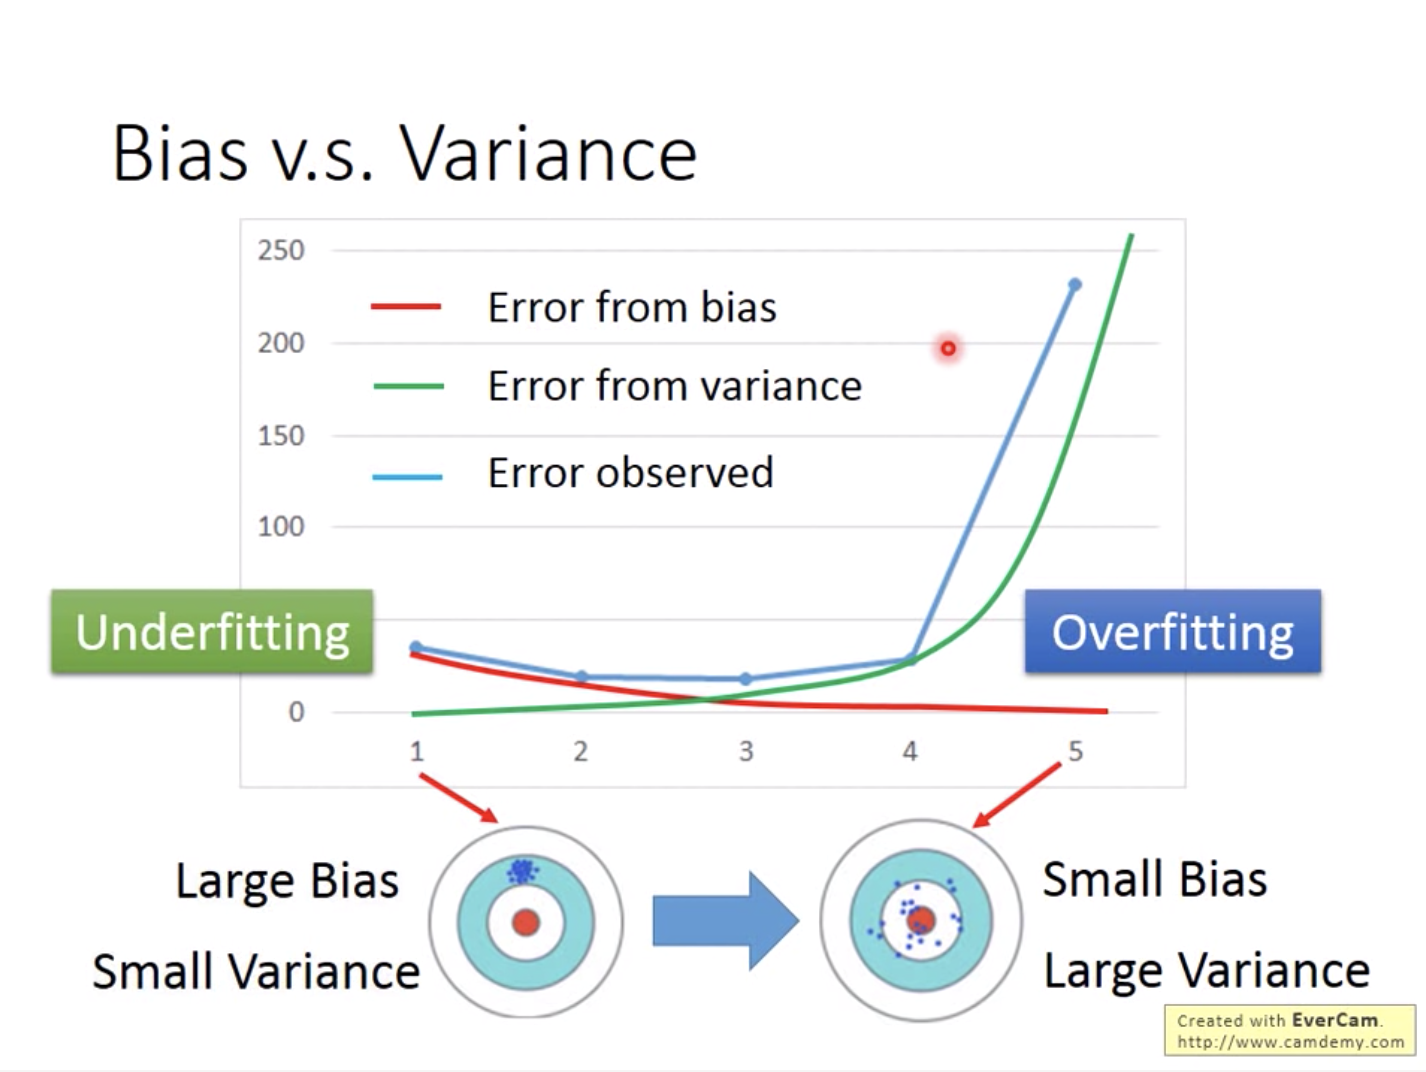

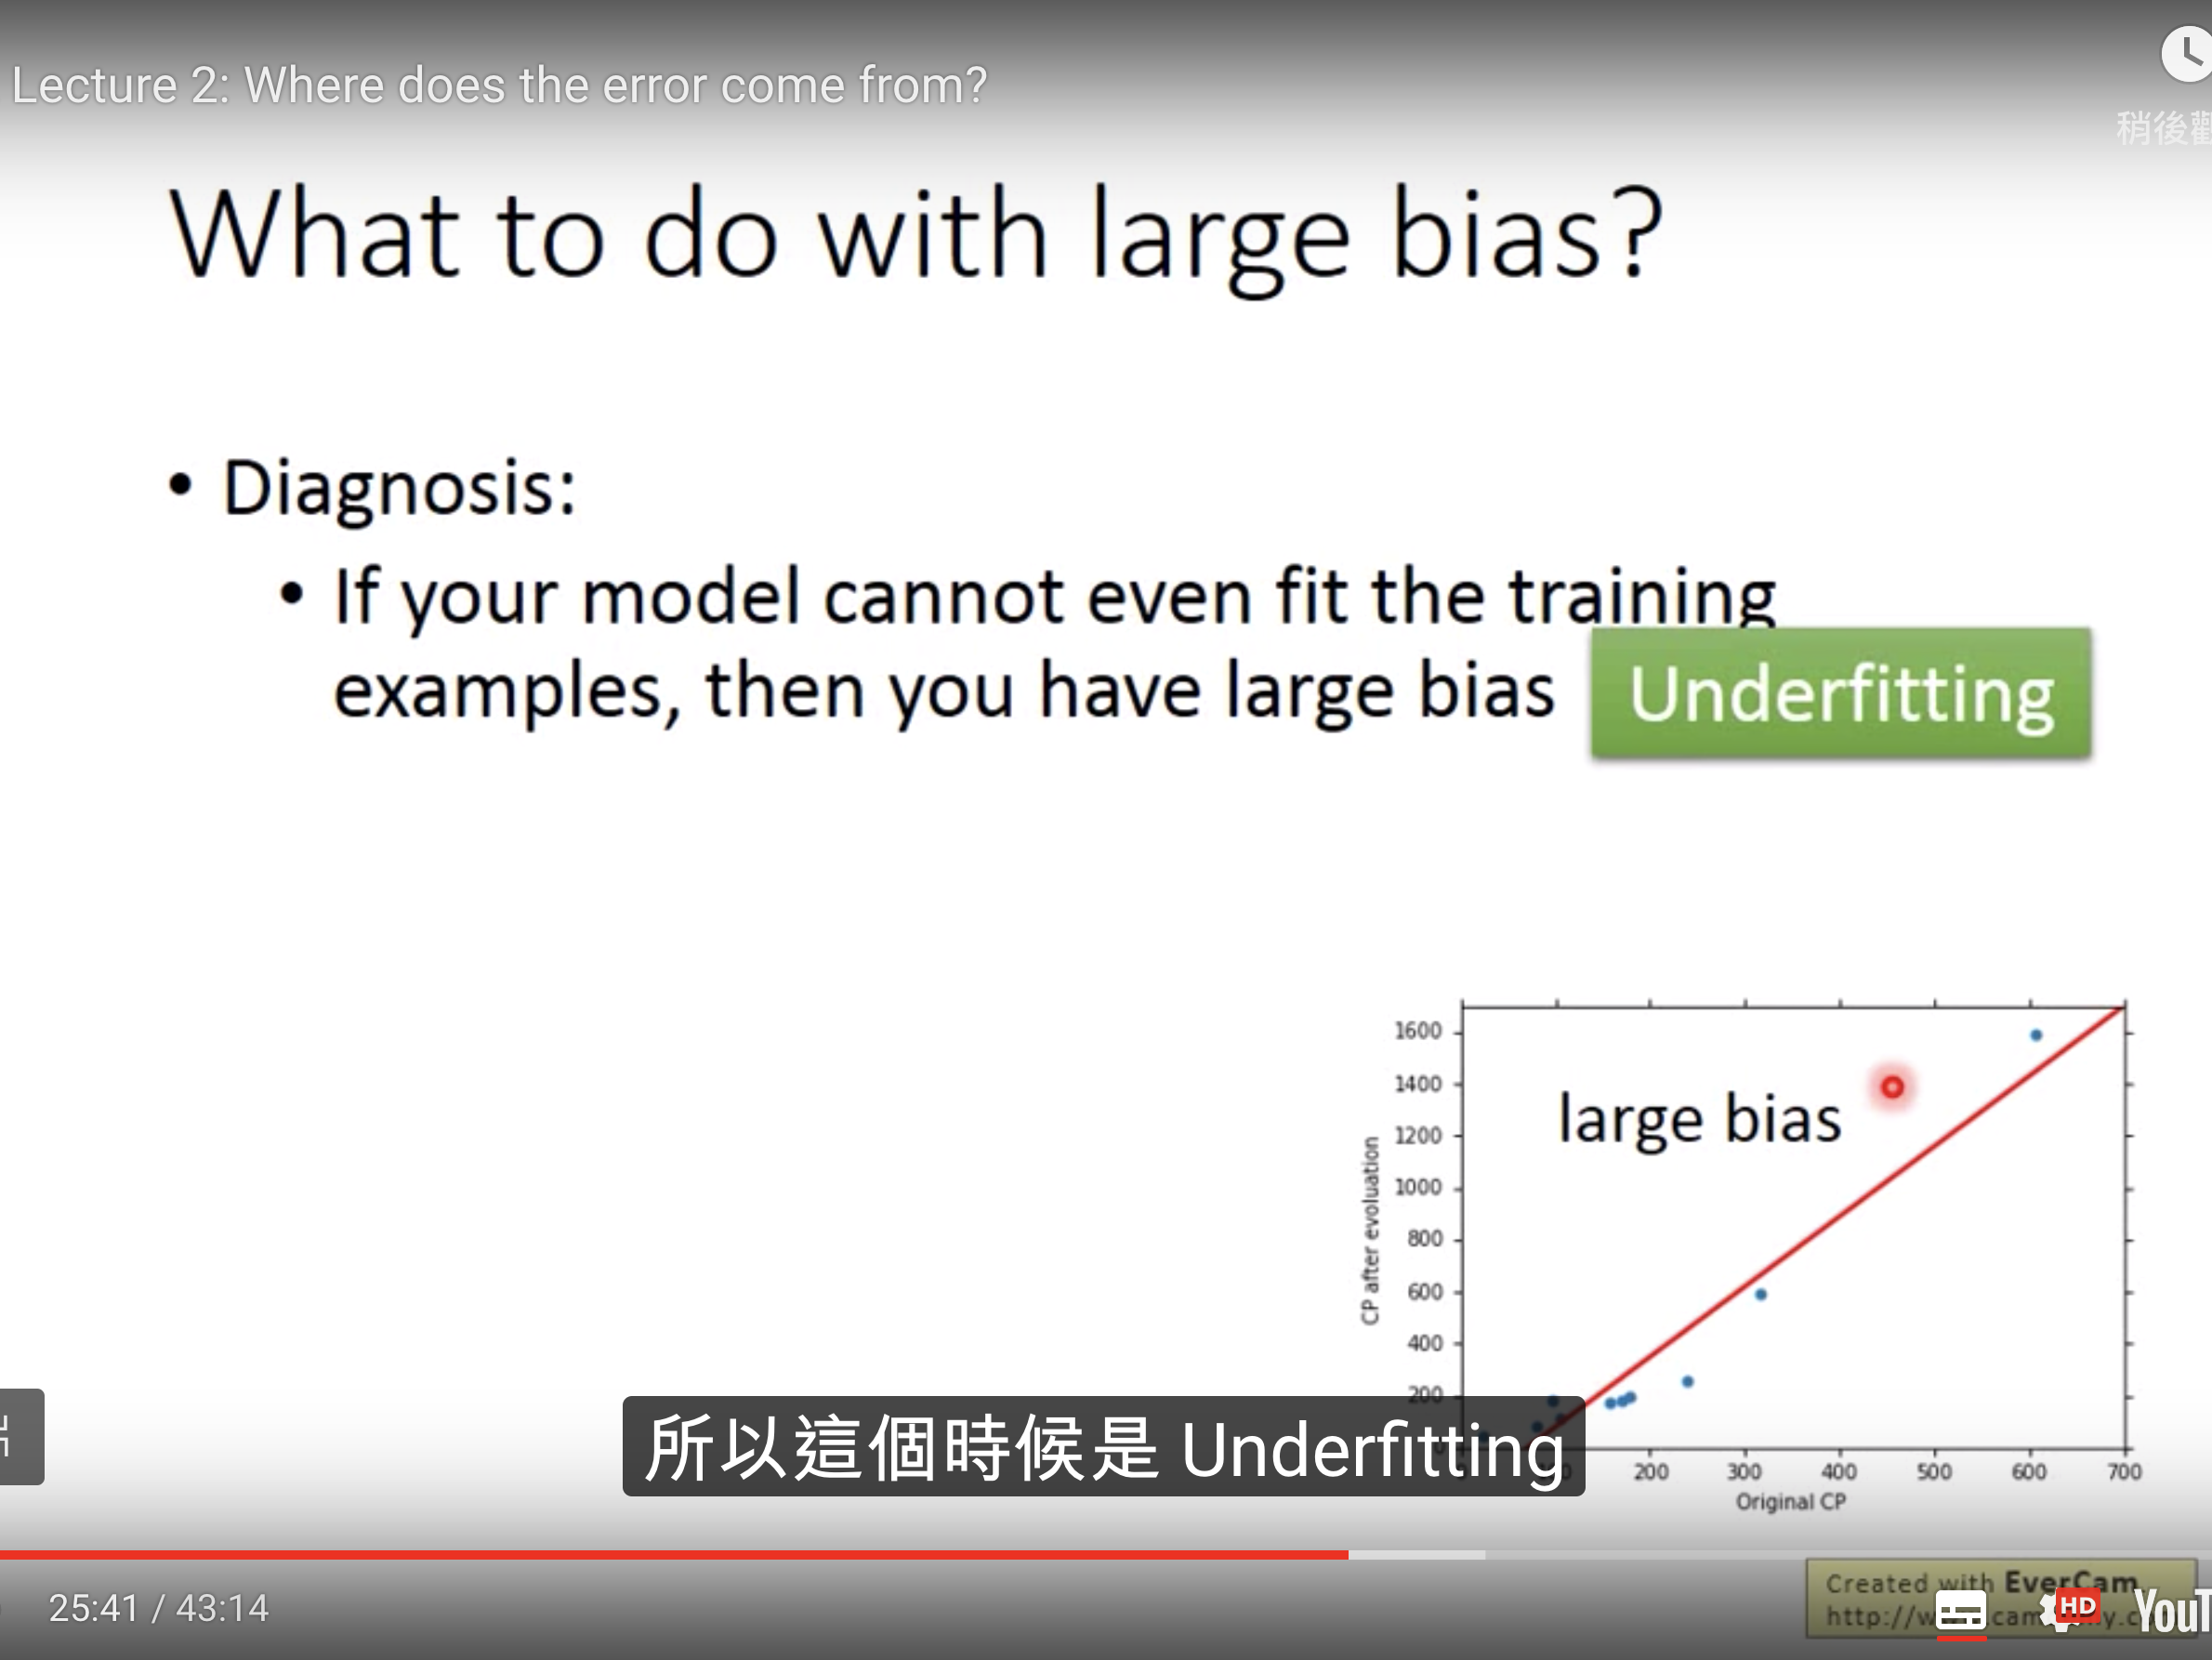


## 如果你今天在 training set 上都無法完美的 fit ，那他就是 bias 很大， underfitting

> ### bias 很大代表今天「實際的 target function」根本就不在你的 model (function set) 裡面，所以你得重新設計你的 model，要擴張你的function set，就要複雜化你的model，例如考慮新的 feature 進去，或考慮一次項不夠，要考慮二次、三次項等等

> ### 這種情況下 collect more data 是沒有幫助的

---

## 如果你今天在 training set 上都完美的 fit ，但 testing data 卻fit得很糟糕，那他就是 variance 很大， overfitting


> ### 增加 data 是有效控制（降低）variance 的方法

> ### Regularization : 在 Loss Function 後面加上一個 term (懲罰項)

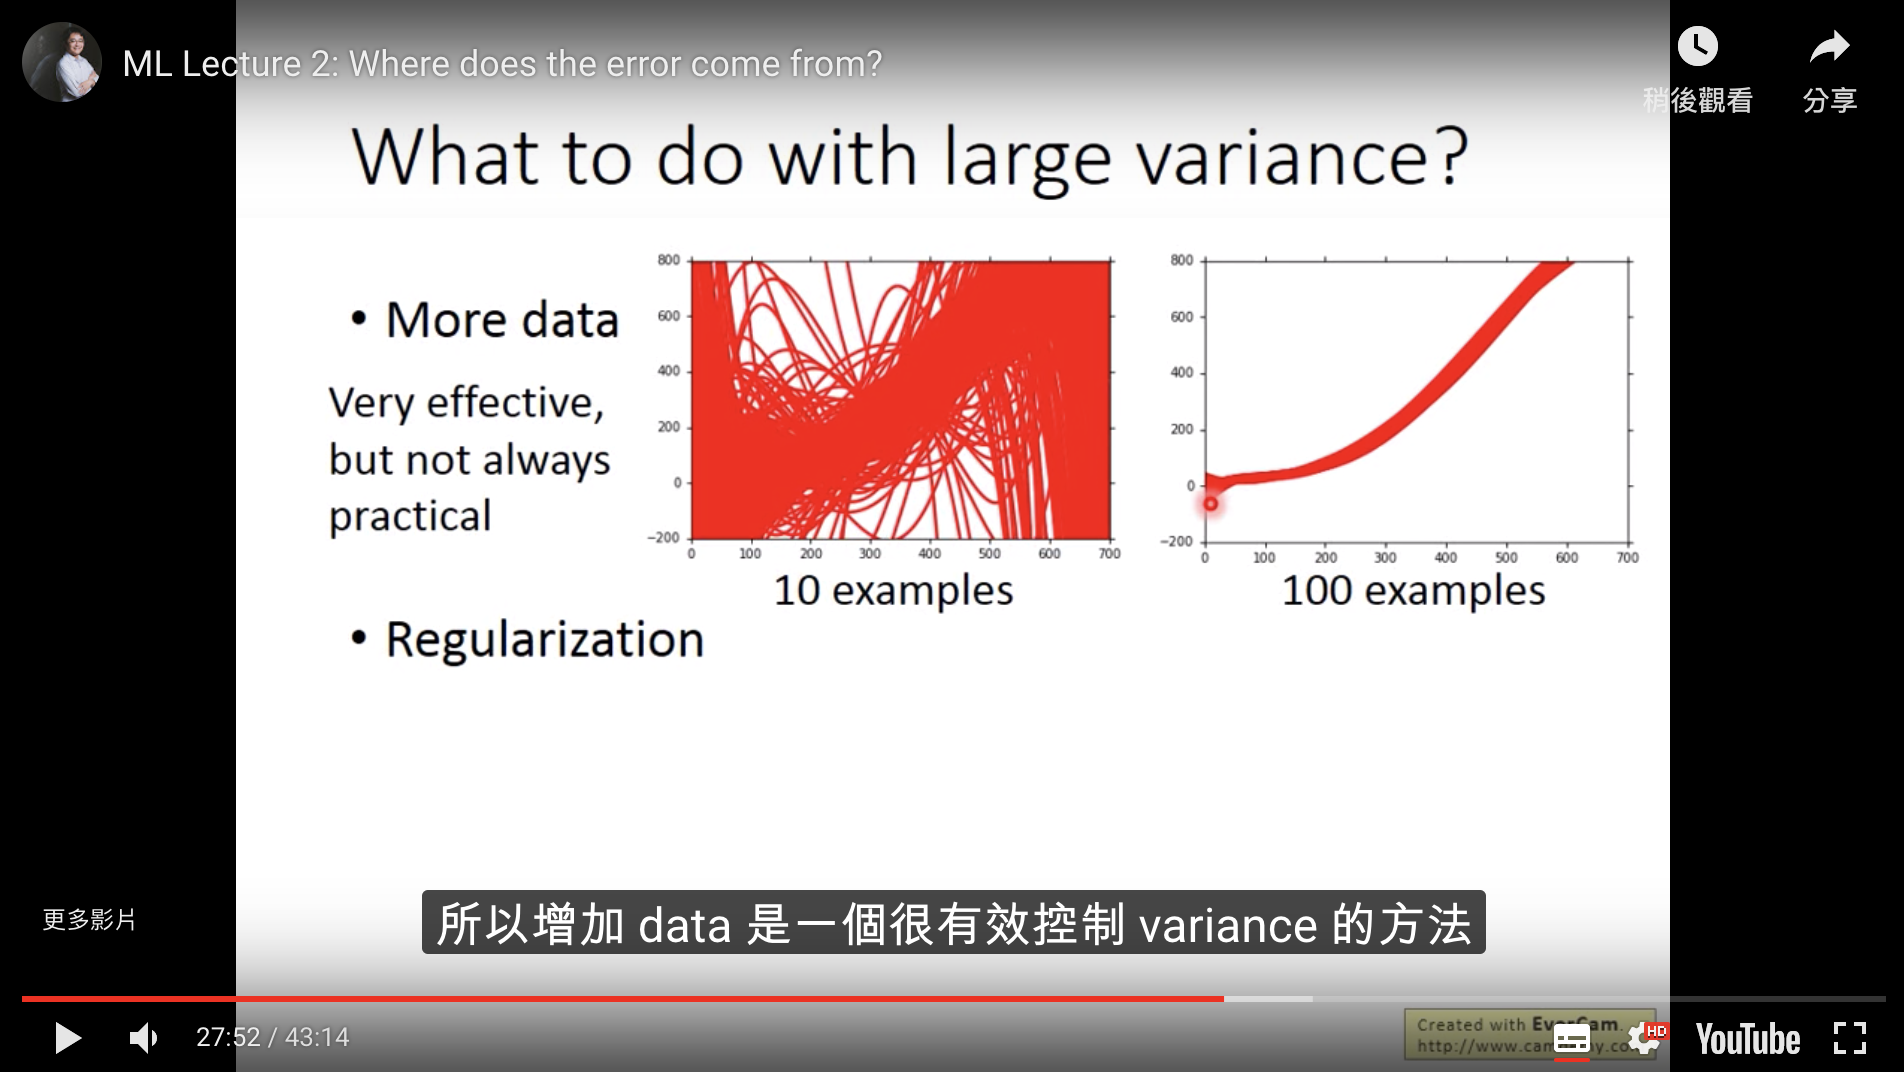